In [1343]:
!pip install geneticalgorithm

import numpy as np
from IPython.display import Image
import math
from numpy import random
from geneticalgorithm import geneticalgorithm as ga

**Parametry wejściowe**

In [1344]:
R = 4 # liczba klas
N = 6 # liczba systemów

In [1345]:
# lambda_0 dla każdej klasy
lambda_0 = [50, 100, 100, 100]

In [1346]:
# macierze prawdopodobieństwa dla klas

#p1 = np.load('matrixy/p1.npy')
#p2 = np.load('matrixy/p2.npy')
#p3 = np.load('matrixy/p3.npy')
#p4 = np.load('matrixy/p4.npy')

p1 = np.array(
      [[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
p2 = np.array(
      [[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
p3 = np.array(
      [[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
p4 = np.array(
      [[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [1347]:
p = [p1, p2, p3, p4]

In [1348]:
#czasy obsługi

#mi = np.load('matrixy/mi.npy')
mi = np.array([[160  , 110  , 170 , 140 ],
       [ 120 , 110  , 110 , 110 ],
       [160  , 110  , 170 , 140 ],
       [110  , 150  , 110 , 110 ],
       [110  , 110  , 130 , 110 ],
       [110  , 110  , 110 , 130 ]])

In [1349]:
# kanały obsługi
m_pocz = [1, 2, 4, 1, 2, 1]

**Obiczanie lambda_matrix - współczynnik strumienia zgłoszeń klasy r w systemie i**

In [1350]:
def lambda_values_for_class(class_no):
    A = np.transpose(p[class_no-1]) - np.identity(len(p[class_no-1]))
    l_0_vector = np.zeros(N)
    l_0_vector[0]= lambda_0[class_no-1]
    b = -l_0_vector
    
    return np.linalg.solve(A, b)

In [1351]:
def lambda_matrix():
    lambda_matrix = np.zeros((N, R))
    for r in range(1, R+1):
        vals = lambda_values_for_class(r)
        for i in range(N):
            lambda_matrix[i,r-1] = vals[i]
    return lambda_matrix

In [1352]:
lambda_matrix = lambda_matrix()
lambda_matrix

array([[ 50., 100., 100., 100.],
       [ 50.,   0.,   0.,   0.],
       [  0., 100., 100., 100.],
       [  0., 100.,   0.,   0.],
       [  0.,   0., 100.,   0.],
       [  0.,   0.,   0., 100.]])

**Obliczanie ro_matrix - względna intensywność obsługi klasy r w systemie i**

In [1353]:
def calculate_ro_ir(i, r, m):
    return lambda_matrix[i,r-1]/(m[i]*mi[i][r-1])

In [1354]:
def calculate_ro_i(i, m):
    return sum([calculate_ro_ir(i, r, m) for r in range(R)])

In [1355]:
def get_ro_matrix(m):
    ro_matrix = np.zeros((N, R))
    for r in range(1,R+1):
        for i in range(N):
            ro_matrix[i, r-1] = calculate_ro_ir(i, r, m)
    return ro_matrix

In [1356]:
ro_matrix = get_ro_matrix(m_pocz)
ro_matrix

array([[0.3125    , 0.90909091, 0.58823529, 0.71428571],
       [0.20833333, 0.        , 0.        , 0.        ],
       [0.        , 0.22727273, 0.14705882, 0.17857143],
       [0.        , 0.66666667, 0.        , 0.        ],
       [0.        , 0.        , 0.38461538, 0.        ],
       [0.        , 0.        , 0.        , 0.76923077]])

**Obliczanie K_matrix - średnie liczby zgłoszeń klasy r w systemie i**



*   typ 1, m>1



In [1357]:
def temp_first_part(ro, m):
    denom1 = sum([(((m * ro) ** k) / math.factorial(k)) for k in range(m-1)])
    denom2 = ((m*ro)**m) / (math.factorial(m)*(1-ro))
        
    return 1. / (denom1+denom2)

def calculate_pi_i(i, m):
    m_i = m[i]
    ro_i = calculate_ro_i(i,m)
    
    first_part = temp_first_part(ro_i, m_i)   
    second_part = ((m_i*ro_i)**m_i)/(math.factorial(m_i)*(1-ro_i))
        
    return first_part * second_part
    

In [1358]:
def calculate_K_ir(i, r, m):
    m_i = m[i]
    ro_i = calculate_ro_i(i, m)
    ro_ir = calculate_ro_ir(i, r, m)
    mi_ro = m_i*ro_i
    
    first_part = m_i*ro_ir
    second_part = ro_ir/(1-ro_i)
    third_part = calculate_pi_i(i,m)
    return first_part + (second_part * third_part)


In [1359]:
def get_K_matrix(m):
    K_matrix = np.zeros((N, R))
    
    for r in range(1,R+1):
        for i in range(N):
            K_matrix[i, r-1] = calculate_K_ir(i, r, m)
    
    return np.nan_to_num(K_matrix)

In [1360]:
K_matrix = get_K_matrix(m_pocz)
K_matrix

array([[0.10746256, 0.31261837, 0.20228247, 0.24562872],
       [0.44267041, 0.        , 0.        , 0.        ],
       [0.        , 1.05279436, 0.68121988, 0.82719557],
       [0.        , 2.66666667, 0.        , 0.        ],
       [0.        , 0.        , 0.97215285, 0.        ],
       [0.        , 0.        , 0.        , 4.1025641 ]])

**Obliczanie T_matrix - średni czas przebywania zgłoszenia klasy r w systemie i**

In [1361]:
def get_T_ir(i, r, K_matrix):
    if lambda_matrix[i, r-1] == 0:
        return 0
    return K_matrix[i, r-1]/lambda_matrix[i, r-1]

def get_T_matrix(m):
    T_matrix = np.zeros((N, R))
    K_matrix = get_K_matrix(m)
    for r in range(R+1):
        for i in range(N):
            T_matrix[i,r-1] = get_T_ir(i, r, K_matrix)
    return np.nan_to_num(T_matrix)

In [1362]:
T_matrix = get_T_matrix(m_pocz)
T_matrix

array([[0.00214925, 0.00312618, 0.00202282, 0.00245629],
       [0.00885341, 0.        , 0.        , 0.        ],
       [0.        , 0.01052794, 0.0068122 , 0.00827196],
       [0.        , 0.02666667, 0.        , 0.        ],
       [0.        , 0.        , 0.00972153, 0.        ],
       [0.        , 0.        , 0.        , 0.04102564]])

**Obliczanie W_matrix - średni czas oczekiwania zgłoszenia klasy r w systemi i**

In [1363]:
def get_W_matrix(m):
    W_matrix = np.zeros((N, R))
    T_matrix = get_T_matrix(m)
    W_matrix = T_matrix - 1/mi
    W_matrix[W_matrix<0] = 0
    return np.nan_to_num(W_matrix)

In [1364]:
W_matrix = get_W_matrix(m_pocz)
W_matrix

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00052007, 0.        , 0.        , 0.        ],
       [0.        , 0.00143703, 0.00092985, 0.0011291 ],
       [0.        , 0.02      , 0.        , 0.        ],
       [0.        , 0.        , 0.00202922, 0.        ],
       [0.        , 0.        , 0.        , 0.03333333]])

**Obliczanie Q_matrix - średnia długość kolejki zgłoszeń klasy r w systemie i wyliczona na podstawie reguły Little’a**

In [1365]:
def get_Q_matrix(m):
    Q_matrix = np.zeros((N, R))
    W_matrix = get_W_matrix(m)
    for r in range(R):
        for i in range(N):
            Q_matrix[i,r-1] = lambda_matrix[i,r-1]*W_matrix[i,r-1]
            
    return np.nan_to_num(Q_matrix)

In [1366]:
Q_matrix = get_Q_matrix(m_pocz)
Q_matrix

array([[0.        , 0.        , 0.        , 0.        ],
       [0.02600374, 0.        , 0.        , 0.        ],
       [0.        , 0.14370345, 0.09298458, 0.11290985],
       [0.        , 2.        , 0.        , 0.        ],
       [0.        , 0.        , 0.20292208, 0.        ],
       [0.        , 0.        , 0.        , 3.33333333]])

**Optymalizacja**



*   Parametry wejściowe





In [1367]:
# C1 - koszty oczekiwania zgłoszenia klasy j w kolejce systemu i

C1 = random.randint(20,100, size=(N, R))
C1

array([[74, 37, 72, 29],
       [88, 21, 78, 81],
       [57, 63, 53, 98],
       [22, 56, 72, 34],
       [38, 93, 24, 94],
       [91, 43, 52, 71]])

In [1368]:
# C2 - koszty niezajętości kanałów obsługi w systemie i

C2 = random.randint(1, 4, size=N)
C2

array([2, 1, 3, 1, 2, 3])



*   Funkcja celu



In [1369]:
def f_celu(m):
    m = np.array(m).astype(int)  
    suma = 0
    Q_matrix = get_Q_matrix(m)
    ro = [calculate_ro_i(i, m) for i in range(N)]
    ro = np.array(ro)
    if (np.any(ro >1)):
      suma += 10000
    m_nzi = (m-m*ro)
    for i in range(N):
        for r in range(R):
            suma = suma + C1[i,r]*Q_matrix[i,r] + C2[i]*m_nzi[i]
            
    return suma

In [1370]:
f_celu(m)

10473.073622455988

In [1371]:
varbound=np.array([[1,10]]*N)
model=ga(function=f_celu,dimension=N,variable_type='int',variable_boundaries=varbound)

In [1372]:
def print_results(opt_solution):
    cost_val = f_celu(opt_solution)
    opt_solution = opt_solution.astype(int)

    print(f"Rozwiązanie:\n {opt_solution}")
    print(f"Koszt:\n {cost_val}")
    print(f"lambda_matrix:\n {lambda_matrix}")
    print(f"ro_matrix:\n {get_ro_matrix(opt_solution)}")
    print(f"K_matrix:\n {get_K_matrix(opt_solution)}")
    print(f"T_matrix:\n {get_T_matrix(opt_solution)}")
    print(f"W_matrix:\n {get_W_matrix(opt_solution)}")
    print(f"Q_matrix:\n {get_Q_matrix(opt_solution)}")



 The best solution found:
 [5. 2. 5. 3. 2. 3.]

 Objective function:
 127.58401303993281


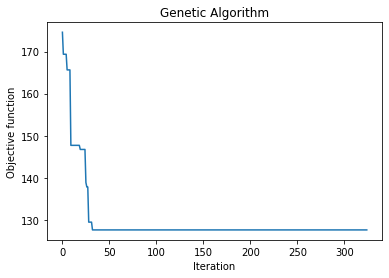

Rozwiązanie znalezione w 32 iteracji
Rozwiązanie:
 [5 2 5 3 2 3]
Koszt:
 127.58401303993281
lambda_matrix:
 [[ 50. 100. 100. 100.]
 [ 50.   0.   0.   0.]
 [  0. 100. 100. 100.]
 [  0. 100.   0.   0.]
 [  0.   0. 100.   0.]
 [  0.   0.   0. 100.]]
ro_matrix:
 [[0.0625     0.18181818 0.11764706 0.14285714]
 [0.20833333 0.         0.         0.        ]
 [0.         0.18181818 0.11764706 0.14285714]
 [0.         0.22222222 0.         0.        ]
 [0.         0.         0.38461538 0.        ]
 [0.         0.         0.         0.25641026]]
K_matrix:
 [[0.33208134 0.9660548  0.62509428 0.75904306]
 [0.44267041 0.         0.         0.        ]
 [0.         0.94033292 0.60845071 0.73883301]
 [0.         0.67715159 0.         0.        ]
 [0.         0.         0.97215285 0.        ]
 [0.         0.         0.         0.78803066]]
T_matrix:
 [[0.00664163 0.00966055 0.00625094 0.00759043]
 [0.00885341 0.         0.         0.        ]
 [0.         0.00940333 0.00608451 0.00738833]
 [0.        

In [1373]:
model.run()    
report = model.report
min_iter = report.index(min(report))
print(f"Rozwiązanie znalezione w {min_iter} iteracji")

opt_solution = model.best_variable

print_results(opt_solution)